In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import seaborn as sns
import cmasher as cm
import mlflow as mlf
import pandas as pd
%matplotlib inline

In [4]:
from panoradio_hf.model_eval import evaluate_model_performance

In [5]:
modelid_checkpoint_map =\
    {"classical-cnn": "epoch=20-val_loss=0.00-other_metric=0.00.ckpt",
     "all-conv-net": "epoch=12-val_loss=0.00-other_metric=0.00.ckpt",
     "deep-cnn": "epoch=19-val_loss=0.00-other_metric=0.00.ckpt",
     "resnet": "epoch=13-val_loss=0.00-other_metric=0.00.ckpt"}

snrid_acc = evaluate_model_performance(modelid_checkpoint_map,
                                       predict_datasplit="test")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                               | 0/? [00:00<?, ?i…

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                               | 0/? [00:00<?, ?i…

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                               | 0/? [00:00<?, ?i…

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                               | 0/? [00:00<?, ?i…

In [32]:
import colormaps as cm
line_colors = list(cm.discrete_dark.colors[[0, 2, 6, 8],:])

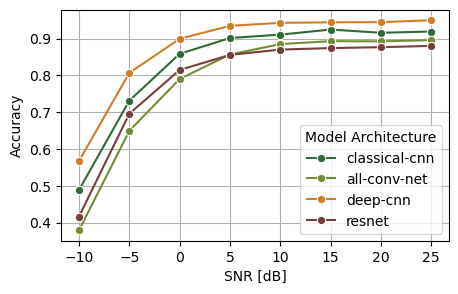

In [46]:
h_fig, h_ax = plt.subplots(1, 1, figsize=(5, 3))

sns.lineplot(data=snrid_acc,
             x="snr",
             y="accuracy",
             hue="modelid",
             marker='o',
             palette=line_colors,
             ax=h_ax)
h_ax.set_ylabel("Accuracy")
h_ax.set_xlabel("SNR [dB]")
h_ax.grid(True)
h_ax.get_children()[-2].set_title("Model Architecture")